In [728]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [729]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro

### Data Preparation

In [730]:
#train = pd.read_csv('C:/Users/jy80530/OneDrive - University of Georgia/Intern/Zillow/Data Science ZExercise_TRAINING_CONFIDENTIAL1.csv')
train = pd.read_csv('D:/OneDrive - University of Georgia/Intern/Zillow/Data Science ZExercise_TRAINING_CONFIDENTIAL1.csv')
test = pd.read_csv('D:/OneDrive - University of Georgia/Intern/Zillow/Data Science ZExercise_TEST_CONFIDENTIAL2.csv')
train = pd.DataFrame(train)
test = pd.DataFrame(test)


In [731]:
train.shape

(11588, 24)

In [732]:
test.shape

(4402, 24)

In [733]:
train.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,ViewType,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,48648941,285000.0,5/23/2015,5.300000e+11,R7,9,4.0,2.00,1900.0,480.0,7482,1.0,1965.0,NaN,47321389,-122213716,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6
1,48648982,309950.0,8/22/2015,5.300000e+11,R8P,9,3.0,2.00,2170.0,320.0,14208,1.0,1953.0,79.0,47482082,-122244269,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6
2,48649024,476000.0,8/27/2015,5.300000e+11,SF 7200,9,4.0,1.00,2150.0,590.0,6500,1.0,1955.0,NaN,47561383,-122308083,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7
3,48649040,324950.0,7/1/2015,5.300000e+11,R1,9,4.0,2.25,2560.0,NaN,15767,1.0,1962.0,79.0,47387929,-122279389,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0
4,48649057,325000.0,6/20/2015,5.300000e+11,LDR,9,4.0,1.75,1720.0,NaN,8620,2.0,1948.0,78.0,47477068,-122263852,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4


In [734]:
train.censusblockgroup.describe()

count    1.158800e+04
mean     5.300000e+11
std      0.000000e+00
min      5.300000e+11
25%      5.300000e+11
50%      5.300000e+11
75%      5.300000e+11
max      5.300000e+11
Name: censusblockgroup, dtype: float64

In [735]:
train.Usecode.describe()

count    11588.0
mean         9.0
std          0.0
min          9.0
25%          9.0
50%          9.0
75%          9.0
max          9.0
Name: Usecode, dtype: float64

In [736]:
# Dropping variables, censusblockgroup and Usecode
# censusblockgroup and Usecode have only one value in each column 
train.drop(['censusblockgroup','Usecode'], axis=1, inplace=True)
test.drop(['censusblockgroup','Usecode'], axis=1, inplace=True)

In [737]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 22 columns):
PropertyID            11588 non-null int64
SaleDollarCnt         11588 non-null float64
TransDate             11588 non-null object
ZoneCodeCounty        11588 non-null object
BedroomCnt            11588 non-null float64
BathroomCnt           11588 non-null float64
FinishedSquareFeet    11588 non-null float64
GarageSquareFeet      8747 non-null float64
LotSizeSquareFeet     11588 non-null int64
StoryCnt              11588 non-null float64
BuiltYear             11588 non-null float64
ViewType              2632 non-null float64
Latitude              11588 non-null int64
Longitude             11588 non-null int64
BGMedHomeValue        11582 non-null float64
BGMedRent             8957 non-null float64
BGMedYearBuilt        11341 non-null float64
BGPctOwn              11588 non-null float64
BGPctVacant           11588 non-null float64
BGMedIncome           11588 non-null int64
BGPctK

### Missing Values

In [738]:
trainNA = (train.isnull().sum() / len(train))*100
trainNA = trainNA.drop(trainNA[trainNA == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :trainNA})
missing_data.head()

,Missing Ratio
ViewType,77.286848
GarageSquareFeet,24.516741
BGMedRent,22.704522
BGMedYearBuilt,2.131515
BGMedHomeValue,0.051778


In [739]:
train['ViewType'].isnull().sum()

8956

In [740]:
train['GarageSquareFeet'].isnull().sum()

2841

In [741]:
train['BGMedRent'].isnull().sum()

2631

In [742]:
train['BGMedYearBuilt'].isnull().sum()

247

In [743]:
train['BGMedHomeValue'].isnull().sum()

6

In [744]:
# There are a lot of NAs in 'ViewType', which means that there are no views on the house. 
# Filling NAs in ViewType' with zero value 
train['ViewType'] = train['ViewType'].fillna(0)

In [745]:
# There are some NAs in 'GrageSquareFeet'. NA means no garage exists on the house.
# Therefore, I filled the missing valueswith with 0.
train['GarageSquareFeet'] = train['GarageSquareFeet'].fillna(0)

In [746]:
# Appling to test dataset
test['ViewType'] = test['ViewType'].fillna(0)
test['GarageSquareFeet'] = test['GarageSquareFeet'].fillna(0)

In [747]:
train.ZoneCodeCounty.unique()

array(['R7', 'R8P', 'SF 7200', 'R1', 'LDR', 'SF 5000', 'R5', 'R4', 'R6',
       'R8.4', 'UM2400', 'R15', 'RS9.6', 'SR6', 'SFD', 'RS7200', 'R8',
       'RS7.2', 'RS5.0', 'RA10', 'RA5SO', 'RA5', 'RA10SO', 'RA2.5', 'LR1',
       'RSA 8', 'R9.6', 'UR', 'R 9600', 'R3.5', 'R2.5', 'R1.8', 'UL7200',
       'LR2', 'SF 9600', 'R 8400', 'RA2.5SO', 'SFS', 'RIN SINGLE F',
       'RS 7200', 'R3', 'RS9600', 'R6P', 'R18', 'RSX 7.2', 'RS4000', 'F',
       'R1SO', 'SR1', 'SR4.5', 'RS15.0', 'A10', 'CBSO', 'RA5P', 'MUR45',
       'R 5400D', 'SFR 10.0', 'RS 7.2', 'A35', 'TC4', 'R2', 'RS8400',
       'RS 8.5', 'R 2800, OP', 'SVV', 'TC', 'RS12000', 'RS 5.0', 'RSA 6',
       'RM18', 'UL15000', 'UL9600', 'RC', 'RSX 35', 'RS', 'RS 15000',
       'RM 3.6', 'WD II', 'LR3', 'DCE', 'R4.5', 'R6SO', 'SR8', 'R 7200',
       'R6C', 'RCC', 'R14', 'R12', 'R24', 'MDR', 'RS 12.5', 'R20', 'MHO',
       'PLA 6E', 'SFSL', 'MRD', 'RM12', 'RSA 4', 'R16', 'AI1', 'RA2.5P',
       'RMF', 'RS 6', 'RA3600', 'O', 'CB', 'T', 'MC', 'RS

In [748]:
train_zone = train[['BGMedRent','BGMedYearBuilt','BGMedHomeValue', 'ZoneCodeCounty']]
grouped_zone = train_zone.groupby(['ZoneCodeCounty'])
grouped_zone.mean()

,BGMedRent,BGMedYearBuilt,BGMedHomeValue
ZoneCodeCounty,,,
A10,1099.571429,1977.187500,381368.750000
A35,1110.363636,1977.923077,361892.307692
AI1,873.000000,1971.000000,271600.000000
BO,874.000000,1946.000000,272300.000000
C1,935.666667,1974.166667,207750.000000
...,...,...,...
UR,1288.964286,1978.955556,332155.555556
URPSO,1816.280899,2003.797753,498769.662921
UV,1713.142857,2004.000000,515428.571429


In [749]:
# Initially, I tried to filled NAs in three 'BGM' variables with its mean based on ZoneCodeCounty.
# However, I don't know what exactly each zoning code means. So, I filled NAs with its median. 
train['BGMedHomeValue'] = train['BGMedHomeValue'].fillna(train['BGMedHomeValue'].median())
train['BGMedRent'] = train['BGMedRent'].fillna(train['BGMedRent'].median())
train['BGMedYearBuilt'] = train['BGMedYearBuilt'].fillna(train['BGMedYearBuilt'].median())

In [750]:
test['BGMedHomeValue'] = test['BGMedHomeValue'].fillna(test['BGMedHomeValue'].median())
test['BGMedRent'] = test['BGMedRent'].fillna(test['BGMedRent'].median())
test['BGMedYearBuilt'] = test['BGMedYearBuilt'].fillna(test['BGMedYearBuilt'].median())

In [751]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 22 columns):
PropertyID            11588 non-null int64
SaleDollarCnt         11588 non-null float64
TransDate             11588 non-null object
ZoneCodeCounty        11588 non-null object
BedroomCnt            11588 non-null float64
BathroomCnt           11588 non-null float64
FinishedSquareFeet    11588 non-null float64
GarageSquareFeet      11588 non-null float64
LotSizeSquareFeet     11588 non-null int64
StoryCnt              11588 non-null float64
BuiltYear             11588 non-null float64
ViewType              11588 non-null float64
Latitude              11588 non-null int64
Longitude             11588 non-null int64
BGMedHomeValue        11588 non-null float64
BGMedRent             11588 non-null float64
BGMedYearBuilt        11588 non-null float64
BGPctOwn              11588 non-null float64
BGPctVacant           11588 non-null float64
BGMedIncome           11588 non-null int64
BGP

In [752]:
train.head()

,PropertyID,SaleDollarCnt,TransDate,ZoneCodeCounty,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,ViewType,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,48648941,285000.0,5/23/2015,R7,4.0,2.00,1900.0,480.0,7482,1.0,1965.0,0.0,47321389,-122213716,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6
1,48648982,309950.0,8/22/2015,R8P,3.0,2.00,2170.0,320.0,14208,1.0,1953.0,79.0,47482082,-122244269,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6
2,48649024,476000.0,8/27/2015,SF 7200,4.0,1.00,2150.0,590.0,6500,1.0,1955.0,0.0,47561383,-122308083,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7
3,48649040,324950.0,7/1/2015,R1,4.0,2.25,2560.0,0.0,15767,1.0,1962.0,79.0,47387929,-122279389,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0
4,48649057,325000.0,6/20/2015,LDR,4.0,1.75,1720.0,0.0,8620,2.0,1948.0,78.0,47477068,-122263852,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4


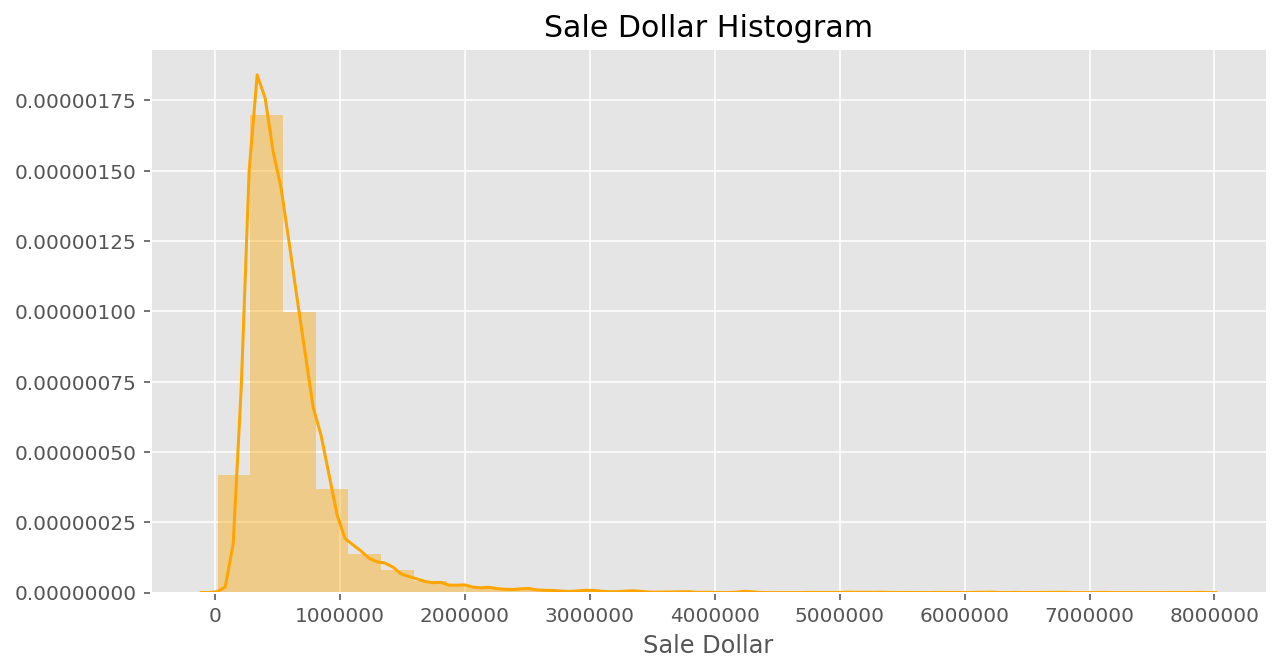

In [753]:
# Our dependent variable is the 'SaleDollarCnt'. Examine the 'SaleDollarCnt'.
# The graphy of sale price is skewed to the right in the histogram. 
# Therefore, 'SaleDollarCnt' is not normally distributed. We might need log transformation of 'SaleDollarCnt'. 
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(train.SaleDollarCnt, bins=30, kde=True, ax=ax, color='orange')
plt.title('Sale Dollar Histogram', fontsize=15)
plt.xlabel('Sale Dollar', fontsize=12);

In [754]:
# One of the key characteristic affecting house prices is the size of the property.
# Especially, 'FinishedSquareFeet' is a variable of interest.
train[['FinishedSquareFeet', 'GarageSquareFeet', 'LotSizeSquareFeet']].head()

,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet
0,1900.0,480.0,7482
1,2170.0,320.0,14208
2,2150.0,590.0,6500
3,2560.0,0.0,15767
4,1720.0,0.0,8620


In [755]:
train.FinishedSquareFeet.describe()

count    11588.000000
mean      2199.899249
std        936.877939
min        270.000000
25%       1530.000000
50%       2060.000000
75%       2700.000000
max      12130.000000
Name: FinishedSquareFeet, dtype: float64

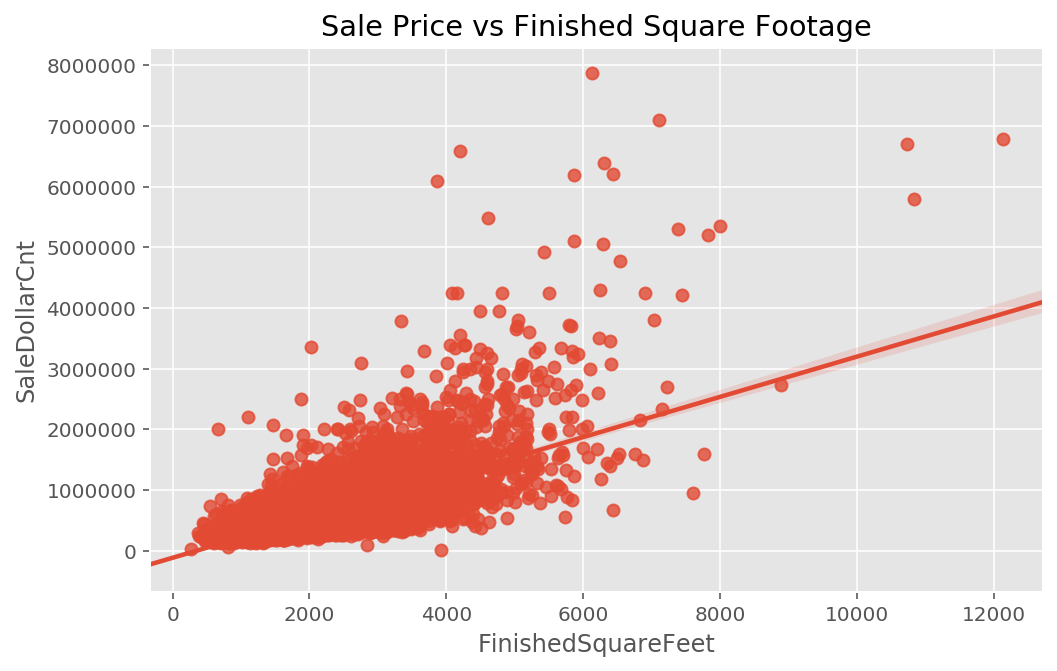

In [756]:
# There is a positive relationship between 'FinishedSquareFeet' and 'SaleDollarCnt'.

fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(x="FinishedSquareFeet", y="SaleDollarCnt", data=train, ax=ax) 
ax.set_title('Sale Price vs Finished Square Footage')
plt.show()

In [757]:
# A simple OLS regression of 'FinishedSquareFeet' on 'SaleDollarCnt'
# R-squared is 46%.
# We need more explantory variables in the model in order to increase R-squared. 

ols = LinearRegression()

X_FSF = train[['FinishedSquareFeet']]
y_SDC = train[['SaleDollarCnt']] #y_SDC = train.SaleDollarCnt

ols.fit(X_FSF, y_SDC)
print("R-squared of Total Square Footage on Sale Price:", ols.score(X_FSF, y_SDC))
print("Intercept:", ols.intercept_)
print("Coefficient:", ols.coef_)

R-squared of Total Square Footage on Sale Price: 0.4602887289822518
Intercept: [-115527.10222663]
Coefficient: [[331.48918643]]


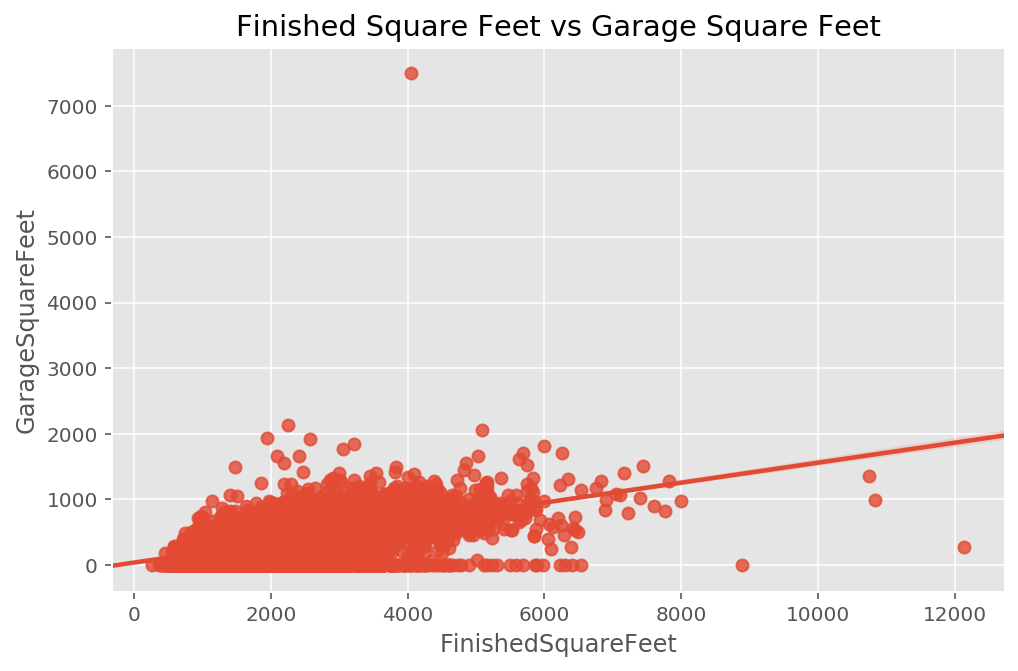

In [758]:
# There is a positive relationship between 'FinishedSquareFeet' and 'GarageSquareFeet'.
fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(x="FinishedSquareFeet", y="GarageSquareFeet", data=train, ax=ax) 
ax.set_title('Finished Square Feet vs Garage Square Feet')
plt.show()


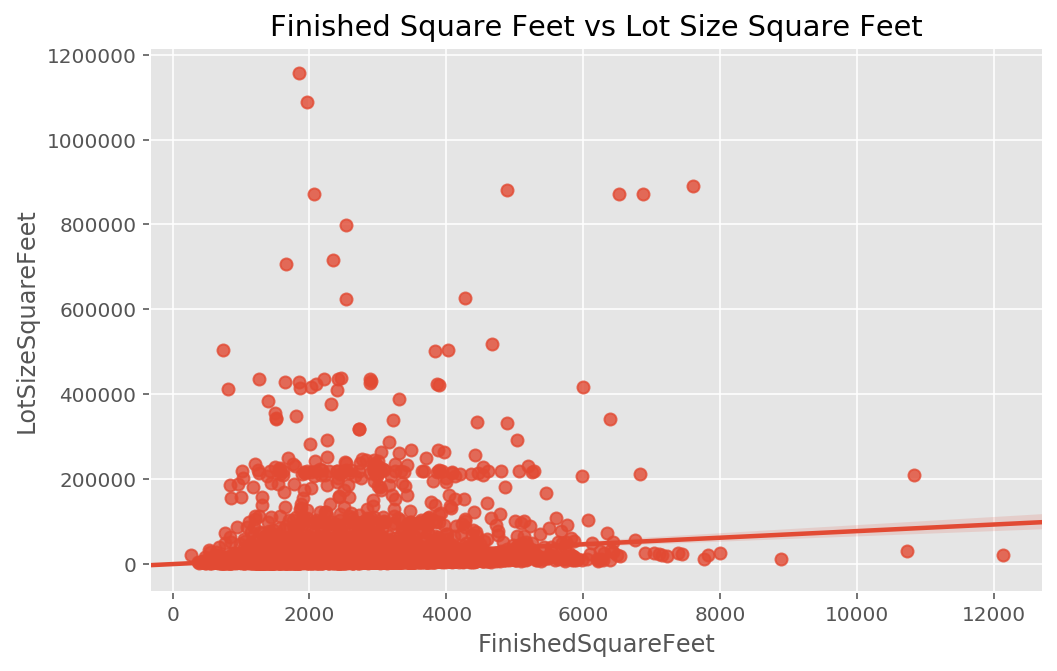

In [759]:
# There is a week positive relationship between 'FinishedSquareFeet' and 'LotSizeSquareFeet'.
fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(x="FinishedSquareFeet", y="LotSizeSquareFeet", data=train, ax=ax) 
ax.set_title('Finished Square Feet vs Lot Size Square Feet')
plt.show()


### Looking for outlier observations

In [760]:
train[['SaleDollarCnt', 'FinishedSquareFeet', 'GarageSquareFeet', 'LotSizeSquareFeet']].describe()

,SaleDollarCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet
count,1.158800e+04,11588.000000,11588.000000,1.158800e+04
mean,6.137157e+05,2199.899249,370.608474,1.601437e+04
std,4.577593e+05,936.877939,285.117970,4.324446e+04
min,2.000000e+04,270.000000,0.000000,1.034000e+03
25%,3.550000e+05,1530.000000,80.000000,5.683750e+03
50%,5.050000e+05,2060.000000,420.000000,7.886500e+03
75%,7.150000e+05,2700.000000,540.000000,1.111100e+04
max,7.880000e+06,12130.000000,7504.000000,1.157824e+06


In [761]:
# Detecting outliers using standard deviations
# There are 286 cases of 'SaleDollarCnt' that is more than 2.5 std above the mean.
train.SaleDollarCnt[(train.SaleDollarCnt > 613715.7 + 2.5*457759.3)].count()

286

In [762]:
# However, there are zero cases that is more than 2.5 std below the mean.
train.SaleDollarCnt[(train.SaleDollarCnt < 613715.7 - 2.5*457759.3)].count()

0

In [763]:
# There are 229 cases of 'FinishedSquareFeet' that is more than 2.5 std above the mean.
train.FinishedSquareFeet[(train.FinishedSquareFeet > 2199.9 + 2.5*936.9)].count()

229

In [764]:
# However, there are zero cases that is more than 2.5 std below the mean.
train.FinishedSquareFeet[(train.FinishedSquareFeet < 2199.9 - 2.5*936.9)].count()

0

In [765]:
# There are 107 cases of 'GarageSquareFeet' that is more than 2.5 std above the mean
train.GarageSquareFeet[(train.GarageSquareFeet > 370.6 + 2.5*285.1)].count()

107

In [766]:
# However, there are zero cases that is more than 2.5 std below the mean.
train.GarageSquareFeet[(train.GarageSquareFeet < 370.6 - 2.5*285.1)].count()

0

In [767]:
# There are zero cases of 'LotSizeSquareFeet' that is more than 2.5 std above the mean
train.LotSizeSquareFeet[(train.LotSizeSquareFeet > 160143.7 + 2.5*432444.6)].count()

0

In [768]:
# There are zero cases that is more than 2.5 std below the mean.
train.LotSizeSquareFeet[(train.LotSizeSquareFeet < 160143.7 - 2.5*432444.6)].count()

0

In [769]:
train.shape

(11588, 22)

In [770]:
# There are zero observations in the above 2.5 std from means across four variables. 
train_out = train[(train.SaleDollarCnt < 613715.7 + 2.5*457759.3)]
train_out = train[(train.FinishedSquareFeet < 2199.9 + 2.5*936.9)]
train_out = train[(train.GarageSquareFeet < 370.6 + 2.5*285.1)]
train_out = train[(train.LotSizeSquareFeet < 160143.7 + 2.5*432444.6)]
train_out.shape

(11588, 22)

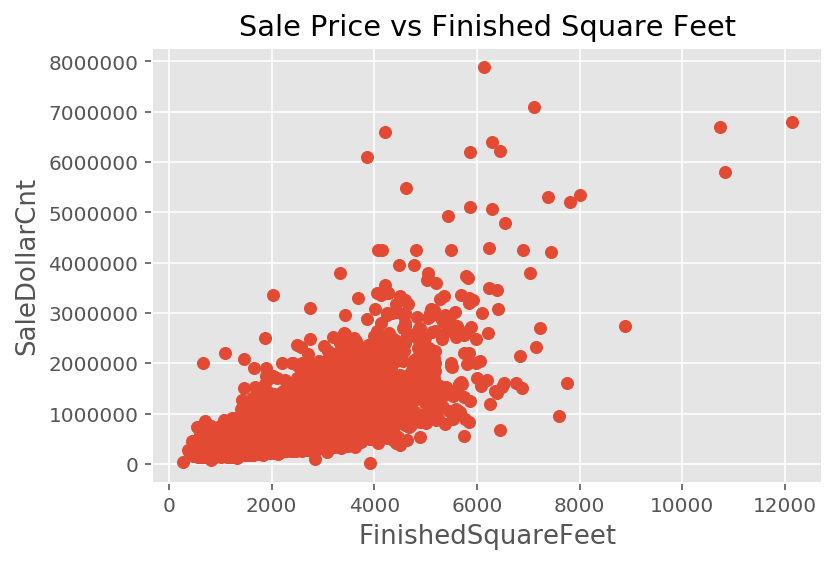

In [771]:
# Personally, rather than rely on standard deviation test, I prefer graph the data to find outliers. 
fig,ax = plt.subplots()

ax.scatter(x = train['FinishedSquareFeet'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('FinishedSquareFeet', fontsize=13)
ax.set_title('Sale Price vs Finished Square Feet')
plt.show()

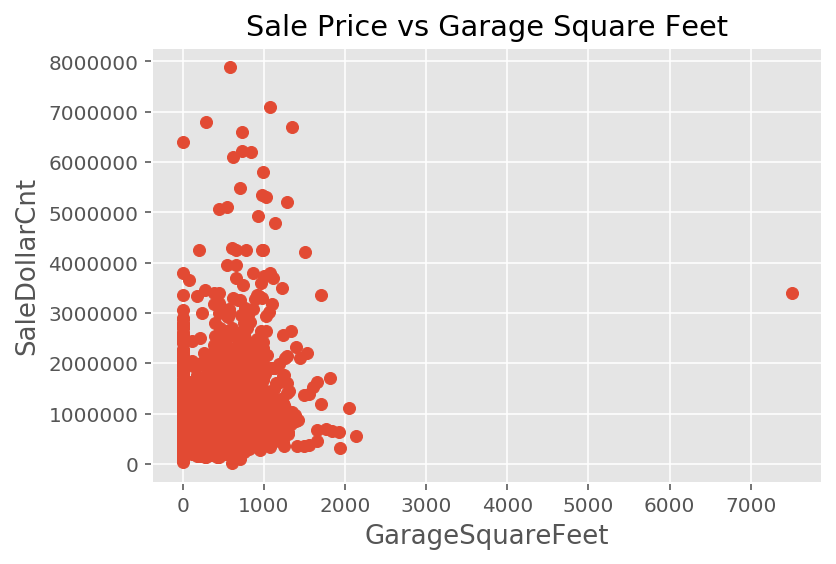

In [772]:
fig,ax = plt.subplots()
ax.scatter(x = train['GarageSquareFeet'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('GarageSquareFeet', fontsize=13)
ax.set_title('Sale Price vs Garage Square Feet')
plt.show()

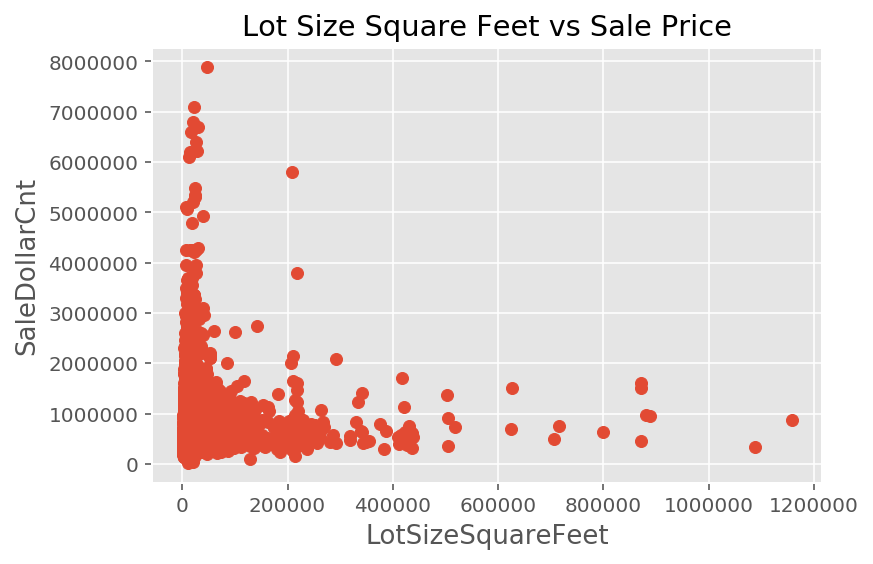

In [773]:
fig,ax = plt.subplots()
ax.scatter(x = train_out['LotSizeSquareFeet'], y = train_out['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('LotSizeSquareFeet', fontsize=13)
ax.set_title('Lot Size Square Feet vs Sale Price')
plt.show()

In [774]:
#Deleting outliers
# 6 cases are removed.
train_out = train[(train.FinishedSquareFeet < 10000)]
train_out = train_out[(train_out.GarageSquareFeet < 3000)]
train_out = train_out[(train_out.LotSizeSquareFeet < 1000000)]
train_out.shape

(11582, 22)

In [775]:
#Deleting outliers
# no cases are removed. 
test_out = test[(test.FinishedSquareFeet < 10000)]
test_out = test_out[(test_out.GarageSquareFeet < 3000)]
test_out = test_out[(test_out.LotSizeSquareFeet < 1000000)]
test_out.shape

(4402, 22)

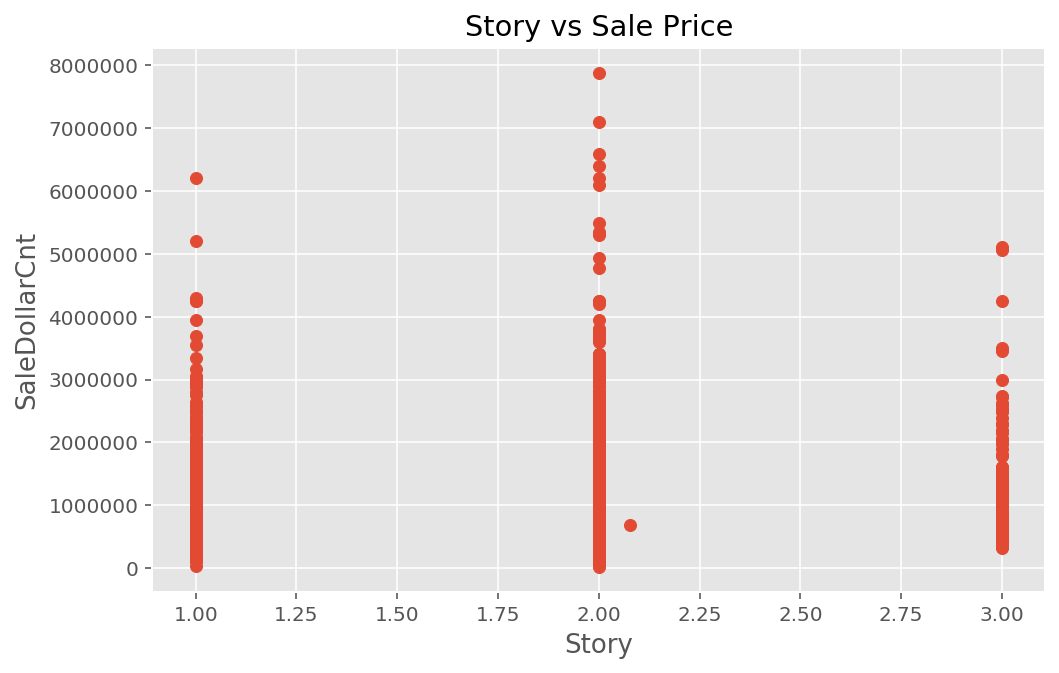

In [776]:
# There is one outlier for StoryCnt. Obviously, it is supposed to be 2 instead of 2.xxx.
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x = train_out['StoryCnt'], y = train_out['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('Story', fontsize=13)
ax.set_title('Story vs Sale Price')
plt.show()

In [777]:
train_out['StoryCnt'].value_counts()

2.000000    5851
1.000000    5596
3.000000     134
2.076923       1
Name: StoryCnt, dtype: int64

In [778]:
train_out['StoryCnt'].replace(2.076923077, 2, inplace=True)

In [779]:
train_out['StoryCnt'].value_counts()

2.0    5852
1.0    5596
3.0     134
Name: StoryCnt, dtype: int64

In [780]:
train_out['BathroomCnt'].value_counts()

3.000000    2280
2.500000    1938
1.000000    1852
2.000000    1830
1.750000     859
2.250000     692
4.000000     437
2.750000     432
1.500000     429
3.500000     273
3.250000     261
5.000000      88
3.750000      62
4.250000      38
4.500000      34
0.750000      19
4.750000      16
6.000000      13
7.000000       9
5.250000       3
1.250000       3
5.750000       3
5.500000       3
2.596154       1
1.846154       1
2.192308       1
7.250000       1
6.500000       1
3.065385       1
3.230769       1
2.623077       1
Name: BathroomCnt, dtype: int64

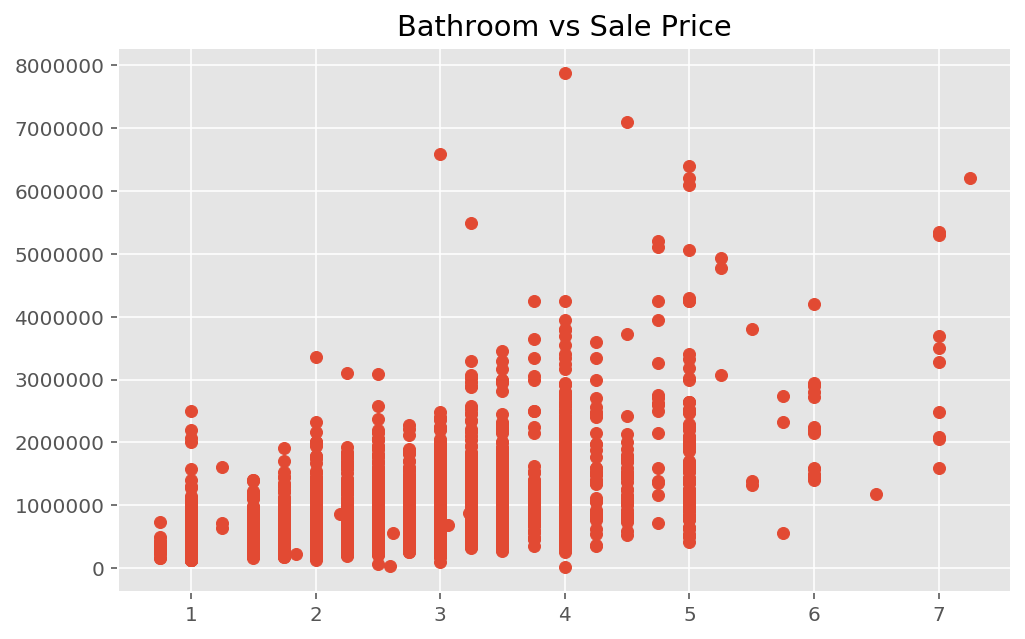

In [781]:
# I am not sure how 'BathroomCnt' is measured. I guess 'BathroomCnt' is the sum of full bathroom and half bathroom.
# Therefore, I do not change values in 'BathroomCnt'
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x = train_out['BathroomCnt'], y = train_out['SaleDollarCnt'])
ax.set_title('Bathroom vs Sale Price')
plt.show()

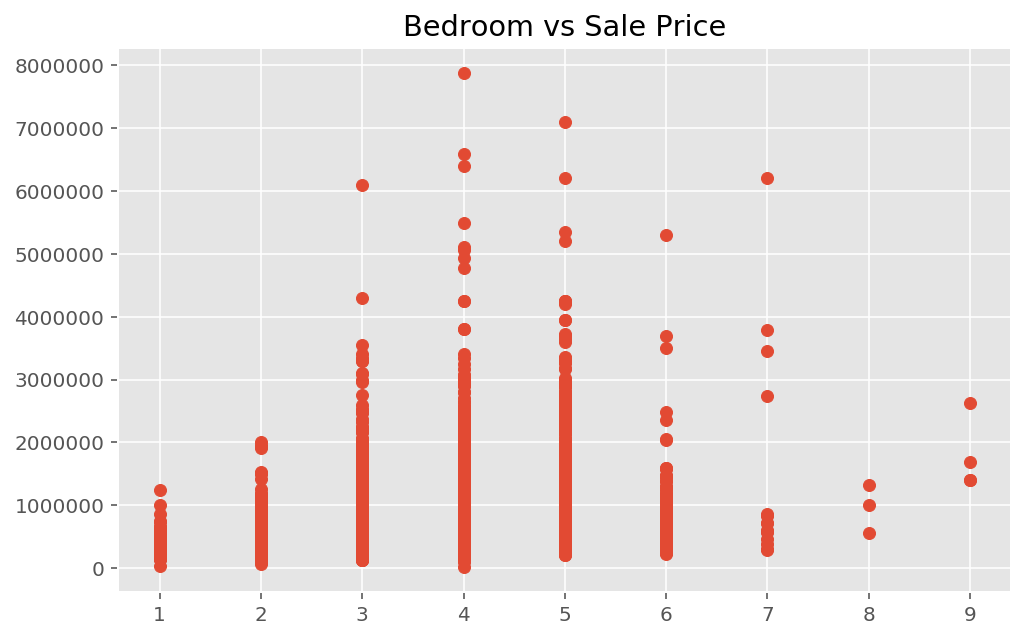

In [835]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x = train_out['BedroomCnt'], y = train_out['SaleDollarCnt'])
ax.set_title('Bedroom vs Sale Price')
plt.show()

In [783]:
train_out['BedroomCnt'].value_counts()

3.000000    5107
4.000000    4176
2.000000    1101
5.000000     957
6.000000     113
1.000000     103
7.000000      15
9.000000       4
8.000000       3
3.615385       1
3.384615       1
3.461538       1
Name: BedroomCnt, dtype: int64

In [784]:
train_out['BedroomCnt'].replace(3.384615385, 3, inplace=True)
train_out['BedroomCnt'].replace(3.615384615, 3, inplace=True)
train_out['BedroomCnt'].replace(3.461538462, 3, inplace=True)

In [785]:
train_out['BedroomCnt'].value_counts()

3.0    5110
4.0    4176
2.0    1101
5.0     957
6.0     113
1.0     103
7.0      15
9.0       4
8.0       3
Name: BedroomCnt, dtype: int64

In [786]:
train_out.shape

(11582, 22)

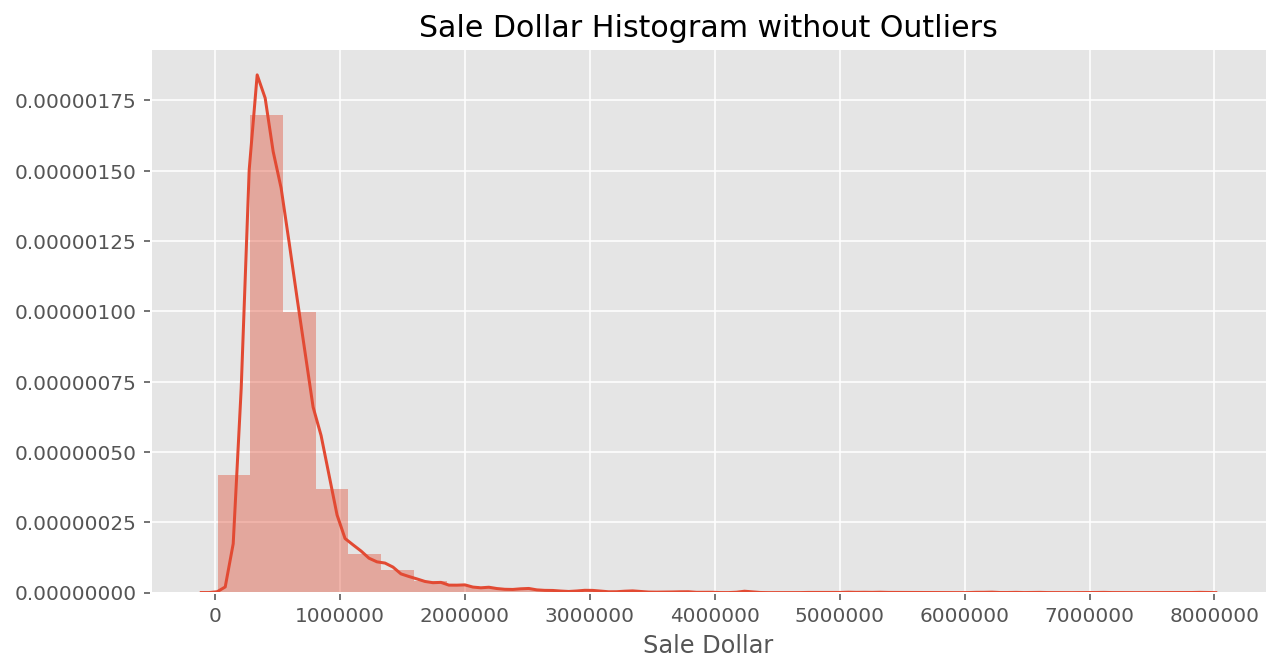

In [787]:
# Even though some outliners are removed, SaleDollarCnt' is still right-skewed. 
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train_out.SaleDollarCnt, bins=30, kde=True, ax=ax)
plt.title('Sale Dollar Histogram without Outliers', fontsize=15)
plt.xlabel('Sale Dollar', fontsize=12);

### Log transformation of SaleDollarCnt

In [788]:
train_out['LnSaleDollarCnt'] = np.log(train_out.SaleDollarCnt)

In [789]:
train_out[['LnSaleDollarCnt', 'SaleDollarCnt']].head(5)

,LnSaleDollarCnt,SaleDollarCnt
0,12.560244,285000.0
1,12.644166,309950.0
2,13.073173,476000.0
3,12.691427,324950.0
4,12.691580,325000.0


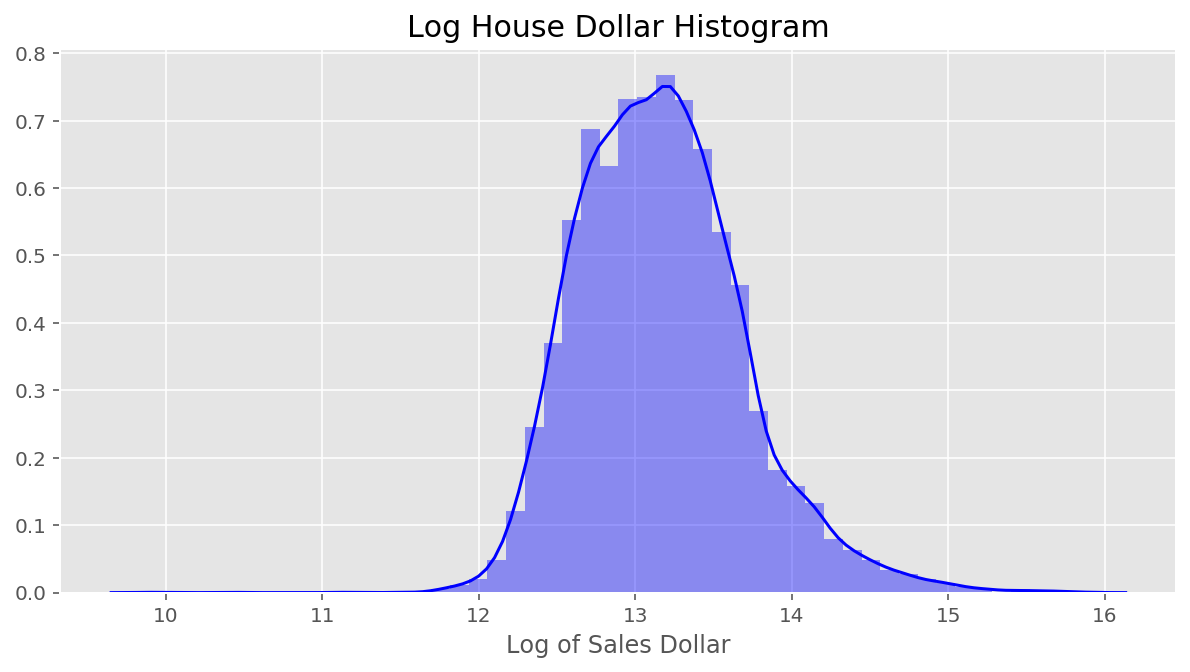

In [790]:
# The 'lnSaleDollarCnt' is more symmetric and normally distributed.
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train_out.LnSaleDollarCnt, bins=50, kde=True, ax=ax, color='blue')
plt.title('Log House Dollar Histogram', fontsize=15)
plt.xlabel('Log of Sales Dollar', fontsize=12);

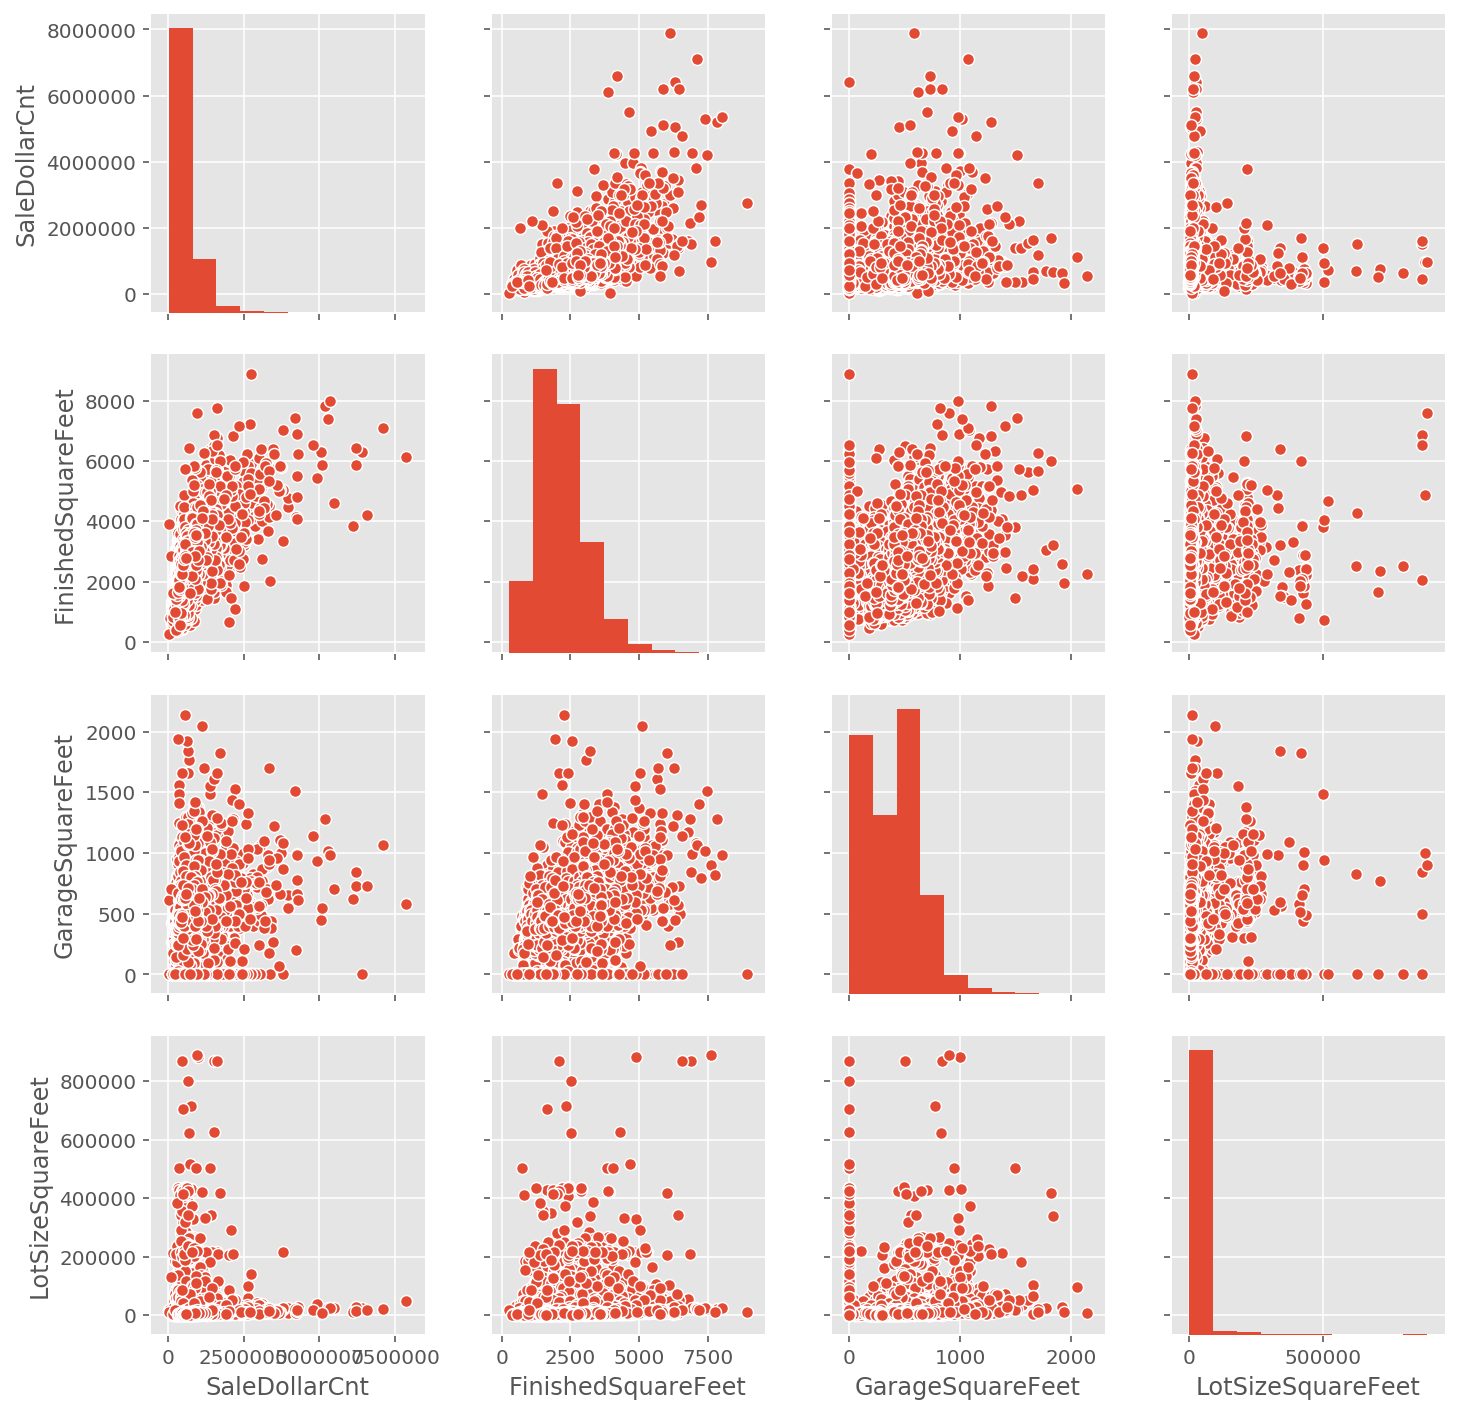

In [791]:
sns.pairplot(train_out[['SaleDollarCnt', 'FinishedSquareFeet', 'GarageSquareFeet','LotSizeSquareFeet']]);

### Creating an "Age" variable

In [792]:
# Transforming 'TransDate' to Year, Month, and Day
train_out['TransDate'] = pd.to_datetime(train_out['TransDate'])

print (train_out['TransDate'].dtype)

train_out['YrTrans'] = train_out['TransDate'].dt.year
train_out['MoTrans'] = train_out['TransDate'].dt.month
train_out['DaTrans'] = train_out['TransDate'].dt.day

datetime64[ns]


In [793]:
# Adding 'Age' variable
train_out['Age'] = train_out.apply(lambda x: x['YrTrans']-x['BuiltYear'], axis=1)

In [794]:
test_out['TransDate'] = pd.to_datetime(test_out['TransDate'])
test_out['YrTrans'] = test_out['TransDate'].dt.year
test_out['MoTrans'] = test_out['TransDate'].dt.month
test_out['DaTrans'] = test_out['TransDate'].dt.day

In [795]:
test_out['Age'] = test_out.apply(lambda x: x['YrTrans']-x['BuiltYear'], axis=1)

### Creating a "Seasonality" variable

In [796]:
# Looking at the 'SaleDollarCnt' grouped by 'MoTrans', there is an obvious impact of the seasonality. 
# The mean 'SaleDollarCnt' in June and September are the highest and the lowest, respectively. 
# Usually, home transactions heat up during the spring and summer months and cool off during the fall and winter. 
print(train_out.SaleDollarCnt.groupby(train_out.MoTrans).mean())

MoTrans
4    614949.954518
5    614010.690454
6    631442.319358
7    600892.917326
8    612495.680806
9    598629.327657
Name: SaleDollarCnt, dtype: float64


In [797]:
# Thus, it might be usefult to incorporate this trend effect in the model. 
train_out.SaleDollarCnt.groupby(train_out.MoTrans).mean().pct_change()

MoTrans
4         NaN
5   -0.001527
6    0.028390
7   -0.048380
8    0.019309
9   -0.022639
Name: SaleDollarCnt, dtype: float64

In [798]:
# Creating seasonality ordinal variable to capture the seasonality effect
def add_seasonal(x):
    if x == 4 or x == 5 or x == 6:
        return 0
    else:
        return 1
    
train_out['Season'] = train_out.MoTrans.map(add_seasonal)

In [799]:
# Higher prices in summer than fall
print(train_out.SaleDollarCnt.groupby(train_out.Season).mean())

Season
0    620173.903829
1    603967.779806
Name: SaleDollarCnt, dtype: float64


In [800]:
def add_seasonal(x):
    if x == 4 or x == 5 or x == 6:
        return 0
    else:
        return 1
    
test_out['Season'] = test_out.MoTrans.map(add_seasonal)

### Dummy variables

In [801]:
# Transforming the 'ViewType' variable to dummy variable
train_out['ViewTypeDum'] = train_out.apply(lambda x: 0 if (x['ViewType'] == 0) 
                             else 1, axis=1)
train_out['ViewTypeDum'].value_counts()

0    8954
1    2628
Name: ViewTypeDum, dtype: int64

In [802]:
# Fixed effect for 'MoTrans' variable
train_out = pd.get_dummies(train_out, columns=['MoTrans'])

In [803]:
train_out.head()

,PropertyID,SaleDollarCnt,TransDate,ZoneCodeCounty,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,ViewType,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,LnSaleDollarCnt,YrTrans,DaTrans,Age,Season,ViewTypeDum,MoTrans_4,MoTrans_5,MoTrans_6,MoTrans_7,MoTrans_8,MoTrans_9
0,48648941,285000.0,2015-05-23,R7,4.0,2.00,1900.0,480.0,7482,1.0,1965.0,0.0,47321389,-122213716,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6,12.560244,2015,23,50.0,0,0,0,1,0,0,0,0
1,48648982,309950.0,2015-08-22,R8P,3.0,2.00,2170.0,320.0,14208,1.0,1953.0,79.0,47482082,-122244269,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6,12.644166,2015,22,62.0,1,1,0,0,0,0,1,0
2,48649024,476000.0,2015-08-27,SF 7200,4.0,1.00,2150.0,590.0,6500,1.0,1955.0,0.0,47561383,-122308083,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7,13.073173,2015,27,60.0,1,0,0,0,0,0,1,0
3,48649040,324950.0,2015-07-01,R1,4.0,2.25,2560.0,0.0,15767,1.0,1962.0,79.0,47387929,-122279389,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0,12.691427,2015,1,53.0,1,1,0,0,0,1,0,0
4,48649057,325000.0,2015-06-20,LDR,4.0,1.75,1720.0,0.0,8620,2.0,1948.0,78.0,47477068,-122263852,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4,12.691580,2015,20,67.0,0,1,0,0,1,0,0,0


In [804]:
test_out['ViewTypeDum'] = test_out.apply(lambda x: 0 if (x['ViewType'] == 0) 
                             else 1, axis=1)
test_out['ViewTypeDum'].value_counts()

0    3404
1     998
Name: ViewTypeDum, dtype: int64

In [805]:
test_out = pd.get_dummies(test_out, columns=['MoTrans'])
test_out.head()

,PropertyID,SaleDollarCnt,TransDate,ZoneCodeCounty,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,ViewType,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,YrTrans,DaTrans,Age,Season,ViewTypeDum,MoTrans_1,MoTrans_10,MoTrans_11,MoTrans_12
0,48735321,NaN,2015-10-31,SF 9600,5.0,4.0,5540,0.0,25338,1.0,1940.0,78.0,47725642,-122283771,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,31,75.0,1,1,0,1,0,0
1,48735471,NaN,2015-11-06,SF 9600,5.0,3.0,2470,510.0,26006,1.0,1966.0,78.0,47726993,-122281969,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,6,49.0,1,1,0,0,1,0
2,49128764,NaN,2015-10-17,SF 7200,4.0,2.0,1680,0.0,8743,2.0,1928.0,0.0,47731749,-122289304,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,17,87.0,1,0,0,1,0,0
3,48897535,NaN,2015-11-19,SF 7200,2.0,1.0,990,260.0,12219,1.0,1940.0,0.0,47728810,-122289224,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,19,75.0,1,0,0,0,1,0
4,49083957,NaN,2015-12-15,SF 9600,4.0,3.0,2960,550.0,23568,1.0,1951.0,82.0,47731170,-122282684,527700.0,1750.0,1956.0,0.9134,0.1061,113450,0.2524,49.6,2015,15,64.0,1,1,0,0,0,1


In [806]:
#train_out = pd.get_dummies(train_out, columns=['ZoneCodeCounty'])

In [807]:
#test_out = pd.get_dummies(test_out, columns=['ZoneCodeCounty'])

### Regression with LnSaleDollarCnt (Hedonic Pricing model)

In [808]:
y_SDC = train_out['SaleDollarCnt']
y_lnSDC = train_out['LnSaleDollarCnt']
y_train = y_lnSDC

In [809]:
X_train = train_out[['BedroomCnt', 'BathroomCnt','FinishedSquareFeet', 'GarageSquareFeet','LotSizeSquareFeet', 'StoryCnt','Age','ViewTypeDum',
       #'MoTrans_5', 'MoTrans_6', 'MoTrans_7','MoTrans_8', 'MoTrans_9','Season','Zone',
       'BGMedHomeValue','BGMedRent','BGMedYearBuilt','BGPctOwn', 'BGPctVacant' , 'BGMedIncome', 'BGPctKids', 'BGMedAge']]

In [810]:
X_test =test_out[['BedroomCnt', 'BathroomCnt','FinishedSquareFeet', 'GarageSquareFeet','LotSizeSquareFeet', 'StoryCnt','Age','ViewTypeDum',
       #'MoTrans_11', 'MoTrans_12', 'MoTrans_1','Season','Zone',
        'BGMedHomeValue','BGMedRent','BGMedYearBuilt','BGPctOwn', 'BGPctVacant' , 'BGMedIncome', 'BGPctKids', 'BGMedAge']]

In [811]:
# Standardizing explanatory variables 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [812]:
X_train.head()

,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,Age,ViewTypeDum,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,0.635903,-0.375524,-0.321393,0.397372,-0.204537,-1.012554,0.371574,-0.541757,-1.830939,-1.085683,0.091449,-0.403849,0.462390,-1.433331,-1.193193,1.312450
1,-0.521938,-0.375524,-0.029660,-0.179974,-0.039245,-1.012554,0.799426,1.845848,-1.416682,-0.852673,-0.249466,-0.878771,-0.539746,-1.125720,0.083577,0.420507
2,0.635903,-1.526958,-0.051270,0.794298,-0.228669,-1.012554,0.728117,-0.541757,-0.501608,-1.404994,-1.556306,-0.584238,-0.866975,-1.049389,-0.280096,0.138058
3,0.635903,-0.087665,0.391731,-1.334667,-0.000933,-1.012554,0.478537,1.845848,-0.839421,-0.924590,0.205088,-1.030114,0.109597,-1.396227,-0.171919,0.033998
4,0.635903,-0.663382,-0.515881,-1.334667,-0.176570,0.903688,0.977697,1.845848,-0.806258,-1.206504,-0.079008,-1.635997,0.072102,-0.815077,-1.400295,0.688090


In [813]:
ols = LinearRegression()
ols.fit(X_train, y_train)

print("R-Squared:", ols.score(X_train, y_train))
print("Intercept:", ols.intercept_)
print("Coefficients:", ols.coef_)

R-Squared: 0.8108768044250007
Intercept: 13.165457505653047
Coefficients: [-0.01521175  0.02711043  0.23134847  0.00830775  0.00524922  0.02293959
 -0.02563445  0.01237605  0.27860568  0.03125385 -0.08098058 -0.05222267
 -0.01063716  0.02235366 -0.06381051 -0.023393  ]


In [814]:
# collect the coefficients
train_ols_coef = pd.DataFrame(ols.coef_, index=X_train.columns, columns=['Coefficients'])
train_ols_coef['Coef_abs'] = train_ols_coef.Coefficients.abs()

In [815]:
ols.fit(X_train, y_train) 
predictions_train = ols.predict(X_train)
predictions_test = ols.predict(X_test)

#predictions_test = ols.predict(X_test)
# Perform 5-fold cross validation
cv_scores = cross_val_score(ols, X_train, y_train, cv=5)

print('Training Score:', ols.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())

Training Score: 0.8108768044250007
Cross validation score: [0.8240171  0.81079094 0.82446976 0.8074033  0.74338846]
Mean cross validation score: 0.8020139130115351


In [816]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions_train))  
print('Median Absolute Error:', metrics.median_absolute_error(y_train, predictions_train))

Mean Absolute Error: 0.1746192078841
Median Absolute Error: 0.1422172867317455


In [817]:
ols_residuals_train = (y_train - predictions_train)
ols_residuals_train.describe()

count    1.158200e+04
mean     1.291394e-15
std      2.302739e-01
min     -4.031894e+00
25%     -1.432279e-01
50%     -1.148227e-03
75%      1.417395e-01
max      1.426981e+00
Name: LnSaleDollarCnt, dtype: float64

In [818]:
# Less skew and kurtosis than the 'all Neighborhood dummies' model, and marginally better result from
# Shapiro-Wilk test of normality
print("Skew:", ols_residuals_train.skew())
print("Kurtosis:", ols_residuals_train.kurtosis())
stat, p = shapiro(ols_residuals_train)
print('Shapiro-Wilk test on normality=%.3f, p=%.3f' % (stat, p))

Skew: -0.3230986714579596
Kurtosis: 9.94634802752245
Shapiro-Wilk test on normality=0.969, p=0.000


D:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


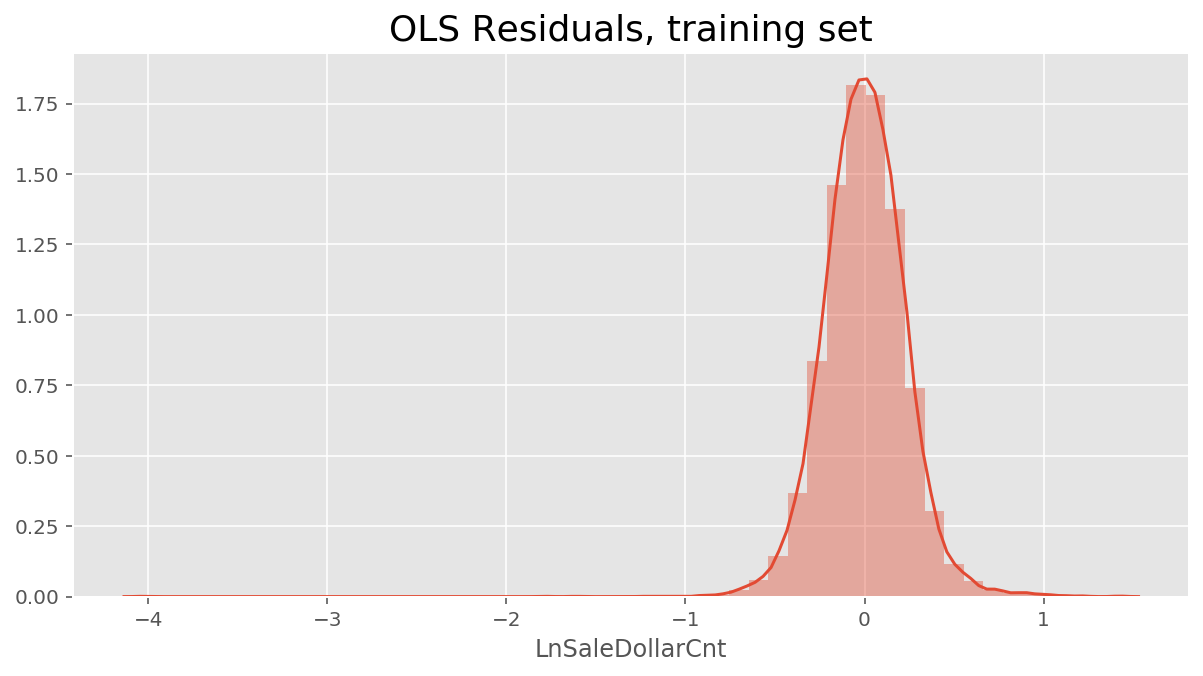

In [819]:
# The residuals are approximately normally distributed with mean 0
# There is an indication of a left-tail, indicating that the model overpredicts the target variable
# at the very low end of 'LnSalePrice'

fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(ols_residuals_train, bins=50, kde=True, ax=ax)
plt.title('OLS Residuals, training set', fontsize=18)
plt.show()

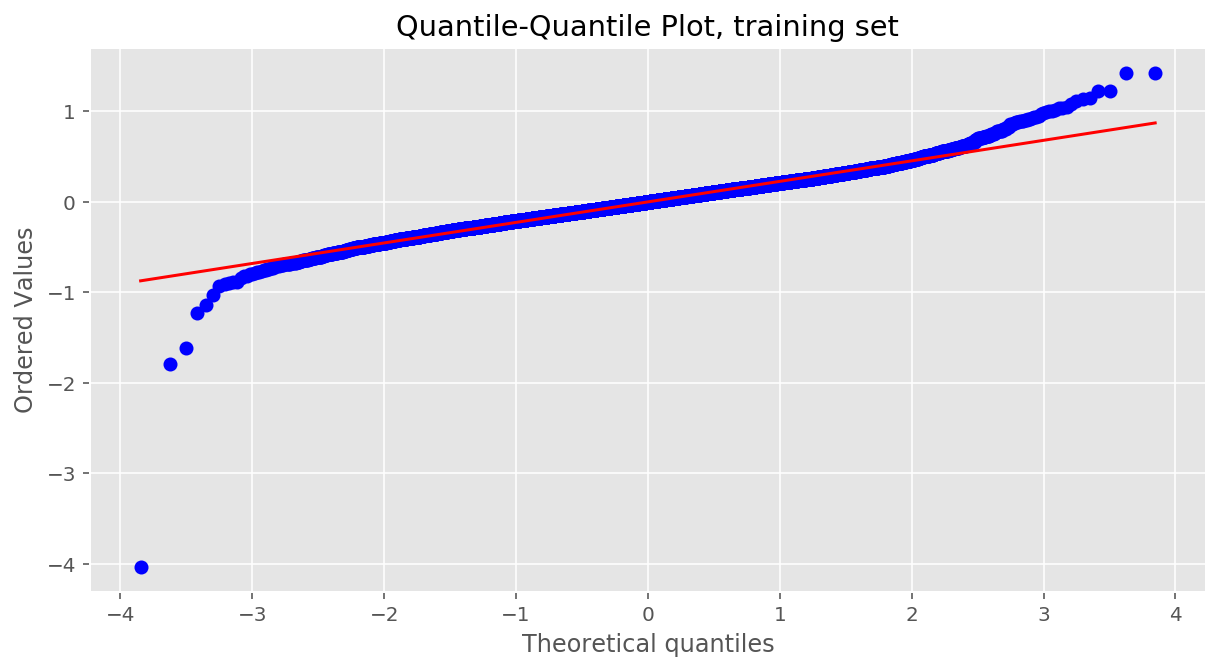

In [820]:
from scipy import stats
fig, ax = plt.subplots(figsize=(10,5))
stats.probplot(ols_residuals_train, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot, training set")
plt.show()

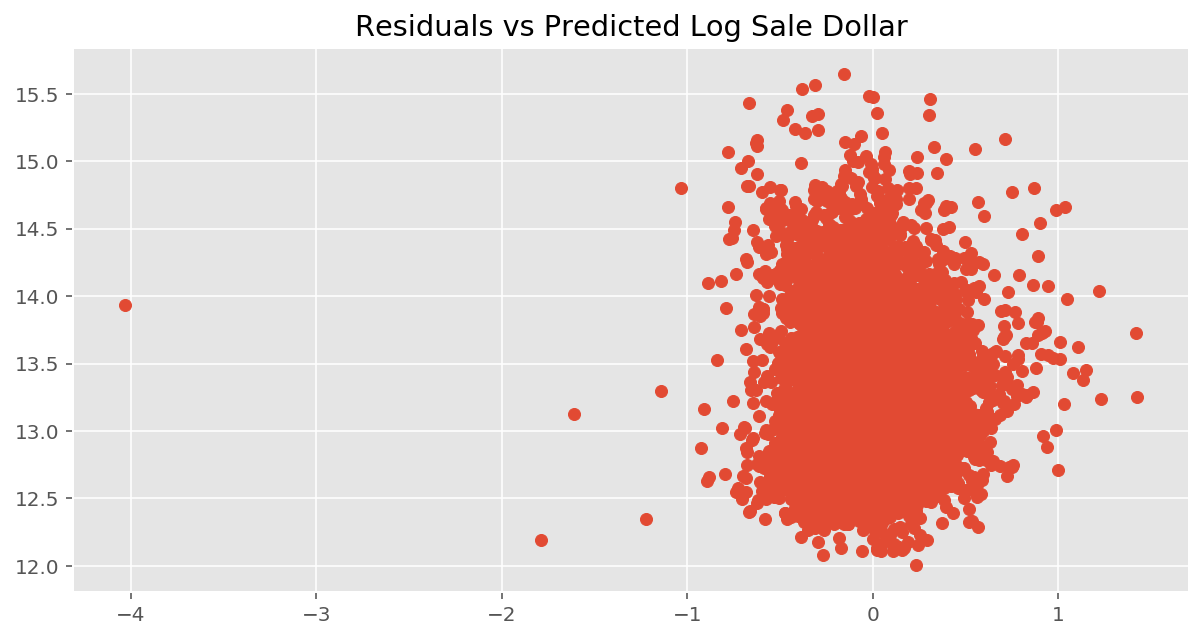

In [821]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(ols_residuals_train, predictions_train)
plt.title("Residuals vs Predicted Log Sale Dollar")
plt.show()

In [822]:
train_unscaled_coef = pd.DataFrame(ols.coef_, index=X_train.columns, columns=['Coefficients'])
train_unscaled_coef

,Coefficients
BedroomCnt,-0.015212
BathroomCnt,0.027110
FinishedSquareFeet,0.231348
GarageSquareFeet,0.008308
LotSizeSquareFeet,0.005249
StoryCnt,0.022940
Age,-0.025634
ViewTypeDum,0.012376
BGMedHomeValue,0.278606
BGMedRent,0.031254


In [823]:
import math

transformed_coef = []
for x in train_unscaled_coef.iloc[:,0]:
    y = math.exp(x)
    transformed_coef.append(y)

print(transformed_coef)

[0.9849033620515325, 1.0274812655733236, 1.2602983365497933, 1.0083423524711914, 1.0052630174020953, 1.0232047289131596, 0.9746913195611366, 1.0124529484769484, 1.3212862354800683, 1.031747376023999, 0.9222115960091506, 0.9491175049047753, 0.9894192174434252, 1.022605379341027, 0.9381827575425713, 0.9768784992823525]


In [824]:
coef_effect = [(x - 1)*train_out.SaleDollarCnt.mean() for x in transformed_coef]
print(coef_effect)

[-9238.690970857368, 16817.712724293808, 159294.79794247088, 5105.270240592186, 3220.809263504879, 14200.600174886164, -15488.155591528715, 7620.832071833223, 196617.56829054633, 19428.444745282348, -47604.177038677626, -31138.5653955268, -6475.122514278477, 13833.816159839243, -37830.303785799035, -14149.667008109356]


### Machine learning models

In [825]:
# Ridge Cross-Validation
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
ridge_mod.fit(X_train, y_train)
predictions_train_1 = ridge_mod.predict(X_train)
predictions_test_1 = ridge_mod.predict(X_test)
print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))

Best Ridge alpha: 0.3593813663804626
Training score: 0.8108768035047726


In [826]:
train_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
train_ridge_coef['Coef_abs'] = train_ridge_coef.Coefficients.abs()

In [827]:
ridge_mod = Ridge(alpha=0.36)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))

Cross-validated training scores: [0.82401837 0.81079191 0.82447205 0.80740192 0.74338536]
Mean cross-validated training score: 0.8020139211268796
Training Score: 0.8108768035016021


In [828]:
# Lasso Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))

Best Lasso alpha: 0.0001
Training score: 0.8108759973401714


In [829]:
train_lasso_coef = pd.DataFrame(lasso_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
train_lasso_coef['Coef_abs'] = train_lasso_coef.Coefficients.abs()

In [830]:
coef_train = pd.concat([train_ols_coef['Coefficients'], train_ridge_coef['Coefficients'], train_lasso_coef['Coefficients']])
coef_train = pd.DataFrame(coef_train)

In [831]:
coef_train.reset_index(level=0, inplace=True)
coef_train.columns = ['variable', 'coefficient']
coef_train.shape

(48, 2)

In [832]:
coef_train.loc[0:15, "model"] = "ols"
coef_train.loc[16:32, "model"] = "ridge"
coef_train.loc[33:49, "model"] = "lasso"

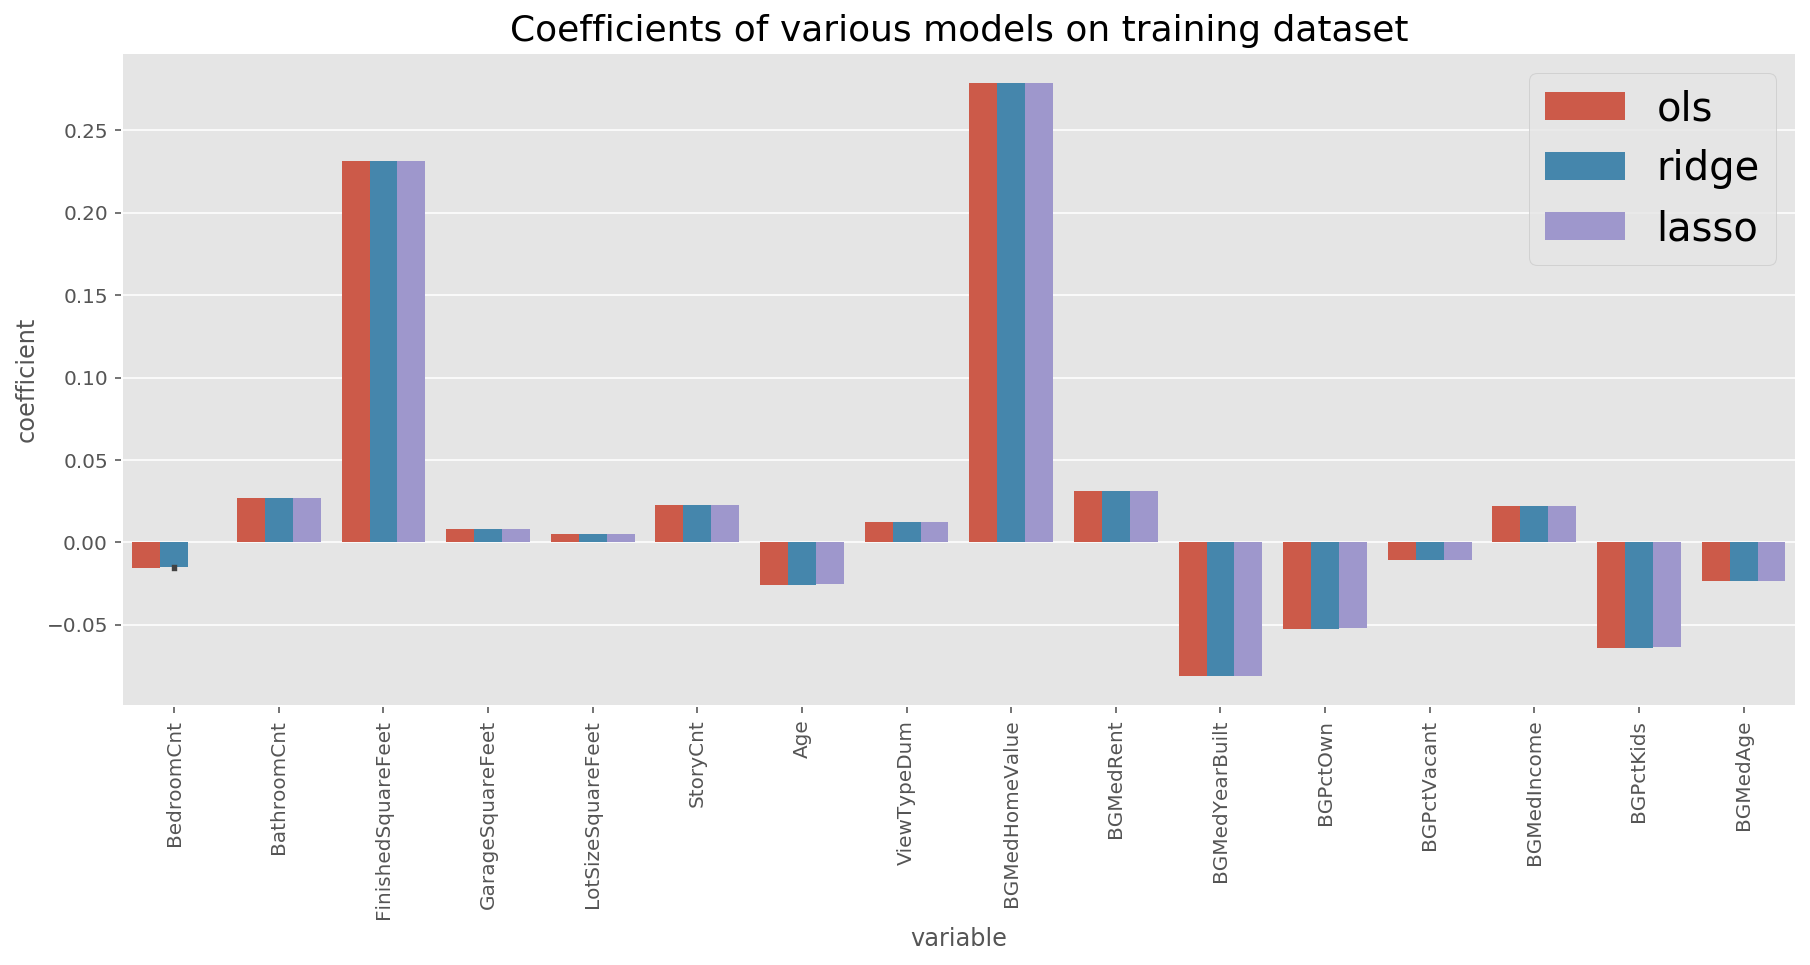

In [833]:
fig, ax = plt.subplots(figsize=(15,6))

sns.catplot(x='variable', y='coefficient', hue='model', data=coef_train, kind='bar', ax=ax)
ax.set_xticklabels(labels=coef_train.variable, rotation=90)
ax.set_title('Coefficients of various models on training dataset', fontsize=18)
ax.set_xticklabels(labels=coef_train.variable, rotation=90)
ax.legend(fontsize=20)
plt.close(2)
plt.show()

In [834]:
results = pd.DataFrame()
results['PropertyID'] = test['PropertyID']
OLS_pred = np.expm1(predictions_test)
results['SaleDollarCnt'] = OLS_pred
results.to_csv('zillow_result_Jaeyong_Yoo.csv',index=False)